# [0] 모듈, 데이터 로드

## [+] 서드파트 모듈 설치

In [2]:
!pip install PublicDataReader --upgrade 
# 공공데이터 사용 라이브러리

  Obtaining dependency information for PublicDataReader from https://files.pythonhosted.org/packages/61/04/b049757e92549e8124cb4ca2a2e9de5fecba1ddda6e9d9493ef5b4e51d19/PublicDataReader-1.0.25-py3-none-any.whl.metadata
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/50/ba/cb7bc9728a3be4e00dfd658fc76dc64fd9dbc3d5492ff44cda70574329c6/lxml-4.9.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB 8.3 MB/s eta 0:00:01
   -------- ------------------------------- 0.7/3.2 MB 8.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.3/3.2 MB 10.6 MB/s eta 0:00:01
   ---------------- ----------------------- 1.3/3.2 MB 10.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.5/3.2 MB 6.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.9/3.2 MB 7.2 MB/s eta 0:00:01
   ----------------------------- ---------- 2.4/3.2 M

## [+] 필요 라이브러리 호출

In [2]:
# 구글 드라이브 연동
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터분석용
import pandas as pd
import numpy as np
import seaborn as sns
import os
import time
from IPython.display import Image
import glob


# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import PublicDataReader as pdr # 공공데이터 라이브러리

## [+] 원본 데이터 호출 (데이터명 : data)

In [ ]:
cd

In [21]:
data=pd.read_csv('C:\\Users\\NT551XCJ\\Desktop\\Code\\학습데이터 전처리\\대회제공데이터\\필지단위 소상공인 매출등급 정보.csv')
pd.options.display.max_rows = 1000
data.head(100)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD
0,202201,1111010100100030100,11110101,A03,4
1,202201,1111010100100480000,11110101,A01,2
2,202201,1111010100100590001,11110101,A11,3
3,202201,1111010100100590005,11110101,A03,2
4,202201,1111010100100690000,11110101,A01,2
5,202201,1111010100100720000,11110101,A14,4
6,202201,1111010100100750000,11110101,A01,2
7,202201,1111010100100940001,11110101,A03,1
8,202201,1111010100100940002,11110101,A01,2
9,202201,1111010100100970000,11110101,A03,2


# [1] GIS 데이터 결합 [한석]

## [1-1] 전처리

### [+] 원본데이터 + 법정동 데이터

- 원본데이터 법정동 코드 => 법정동명으로 변경, 구명칭 포함
- 서울특별시 + 지역구 + 법정동명 + 본번 + 부번 => 주소 추출
- 추출된 주소기반 지오코딩(주소를 좌표계로 변환) 작업
- 지오코딩 완료된 csv파일 shp형식으로 변환 (맵기반 데이터)
- 변환된 각 필지별 반경 1KM Buffer(원) 생성하여 각 요소가 해당 구역내에 얼마나 입점해있는지 분석
- 추출된 GIS 데이터 다시 csv형태로 변환
- 기존 데이터와 병합

<br/>

<참고>
- 원본데이터에서 추출한 고유 필지 주소 '74303'개
- QGIS(GIS분석 프로그램)이 74303개를 동시에 계산할 수 없고, 지오코딩도 최대 1만개까지 동시에 변환이 가능하기 때문에 부득이하게 데이터를 분할하여 작업, 마지막에 최종 병합

In [11]:
# 법정동 코드를 조회할 수 있는 공공데이터 호출
법정동코드 = pdr.code_bdong()
seoul_df = 법정동코드[법정동코드['시도명'] =='서울특별시']
seoul_df.head(2)

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2023. 7. 3. 시행)


,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,,19880423,
1,11,서울특별시,11110,종로구,1111000000,,,19880423,


In [12]:
seoul_df['법정동코드'] = seoul_df['법정동코드'].astype('str') # 정확한 비교를 위한 문자열 변환

<ipython-input-12-e85f500b0009>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_df['법정동코드'] = seoul_df['법정동코드'].astype('str') # 정확한 비교를 위한 문자열 변환


In [13]:
seoul_df = seoul_df[['법정동코드','시군구명','읍면동명']] # 필요 데이터만 추출

### [1-1-1] 분할, 원본 데이터와 법정동 데이터 병합

- 시도 : 일괄적으로 '서울특별시'적용
- 시군구 : 3~5번 코드 추출 <코드 -> 한글 변환> 필요
- 읍면동(법정동) : 6~8번 코드 추출 <코드 -> 한글 변환> 필요
- 리 : 9~10번 코드 그대로 사용
- 필지 : 우선 생략, 필요시 추가
- 본번 : 12~15번 그대로 사용
- 부번 : 16~19번 그대로 사용

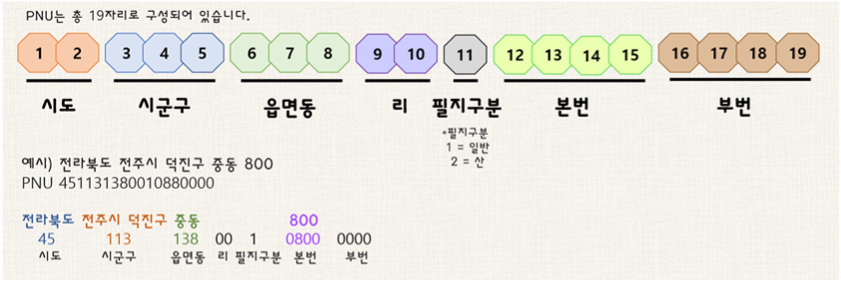

In [25]:
Image('/content/drive/MyDrive/ML프로젝트_우리사이/한석/필지단위.png')

In [15]:
data.head(1) # 데이터 확인

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD
0,202201,1111010100100030100,11110101,A03,4


In [16]:
# 필지 코드 분할을 위해 문자열로 변환
data['LT_UNQ_NO'] = data['LT_UNQ_NO'].astype('str')

In [17]:
# 시군구법정동코드 추출
data['시군구동코드'] = data['LT_UNQ_NO'].str[:10]

In [18]:
data.head(1)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD,시군구동코드
0,202201,1111010100100030100,11110101,A03,4,1111010100


In [19]:
data = pd.merge(data, seoul_df, how='left', left_on='시군구동코드', right_on = '법정동코드')
data.head(1)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD,시군구동코드,법정동코드,시군구명,읍면동명
0,202201,1111010100100030100,11110101,A03,4,1111010100,1111010100,종로구,청운동


In [20]:
# 본번, 부번(세부주소) 추출
data['본번'] = data['LT_UNQ_NO'].str[11:15].astype(int)
data['부번'] = data['LT_UNQ_NO'].str[15:19].astype(int)

In [21]:
data.head(1)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD,시군구동코드,법정동코드,시군구명,읍면동명,본번,부번
0,202201,1111010100100030100,11110101,A03,4,1111010100,1111010100,종로구,청운동,3,100


In [22]:
# 최종 주소 생성
data['도로명주소'] = '서울특별시'+ ' ' +data['시군구명']+ ' '+data['읍면동명']+ ' '+data['본번'].astype(str)+ '-'+data['부번'].astype(str)
data.head(1)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD,시군구동코드,법정동코드,시군구명,읍면동명,본번,부번,도로명주소
0,202201,1111010100100030100,11110101,A03,4,1111010100,1111010100,종로구,청운동,3,100,서울특별시 종로구 청운동 3-100


In [23]:
# 필요 주소 제외하고 데이터 생성
data_plus = data[['DATA_CRTR_YM','LT_UNQ_NO','STDG_EMD_CD', 'INDUSTRY_CD', 'SLS_GRD','시군구명','읍면동명','도로명주소']]
data_plus.head(1)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD,시군구명,읍면동명,도로명주소
0,202201,1111010100100030100,11110101,A03,4,종로구,청운동,서울특별시 종로구 청운동 3-100


In [27]:
# 원본데이터 + 시군구 + 법정동명 + 도로명주소 까지 포함된 데이터
data_plus.to_csv('/content/drive/MyDrive/ML프로젝트_우리사이/data/gis_datas/data_구동주소추가.csv', encoding = 'cp949')

### [1-2] 지오코딩용 데이터 생성

In [ ]:
# 지오코딩용 데이터
data_for_geo= data[['LT_UNQ_NO','도로명주소']]
data_for_geo = data_for_geo.drop_duplicates()
data_for_geo = data_for_geo.reset_index()[['LT_UNQ_NO','도로명주소']]

In [ ]:
data_for_geo.to_csv('C:\\Users\\NT551XCJ\\Desktop\\Code\\학습데이터 전처리\\대회제공데이터\\필지단위 소상공인 매출등급 정보.csv', encoding = 'cp949')

In [ ]:
data_for_geo.shape[0]

In [ ]:
data_for_geo_1 = data_for_geo.iloc[:5000, :]
data_for_geo_2 = data_for_geo.iloc[5000:10000, :]
data_for_geo_3 = data_for_geo.iloc[10000:20000, :]
data_for_geo_4 = data_for_geo.iloc[20000:30000, :]
data_for_geo_5 = data_for_geo.iloc[30000:40000, :]
data_for_geo_6 = data_for_geo.iloc[40000:50000, :]
data_for_geo_7 = data_for_geo.iloc[50000:60000,:]
data_for_geo_8 = data_for_geo.iloc[60000:,:]

In [ ]:
data_for_geo_1.shape[0] + data_for_geo_2.shape[0] + data_for_geo_3.shape[0] + data_for_geo_4.shape[0] + data_for_geo_5.shape[0] + data_for_geo_6.shape[0] +  data_for_geo_7.shape[0] + data_for_geo_8.shape[0]

In [ ]:
data_for_geo_1.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_1.csv', encoding = 'cp949', index = False)
data_for_geo_2.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_2.csv', encoding = 'cp949', index = False)
data_for_geo_3.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_3.csv', encoding = 'cp949', index = False)
data_for_geo_4.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_4.csv', encoding = 'cp949', index = False)
data_for_geo_5.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_5.csv', encoding = 'cp949', index = False)
data_for_geo_6.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_6.csv', encoding = 'cp949', index = False)
data_for_geo_7.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_7.csv', encoding = 'cp949', index = False)
data_for_geo_8.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_8.csv', encoding = 'cp949', index = False)

### [1-3] 원본데이터와 QGIS로 계산한 피처 결합

#### 원본데이터

In [ ]:
data_for_geo_1 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_1.csv', encoding = 'cp949')
data_for_geo_2 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_2.csv', encoding = 'cp949')
data_for_geo_3 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_3.csv', encoding = 'cp949')
data_for_geo_4 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_4.csv', encoding = 'cp949')
data_for_geo_5 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_5.csv', encoding = 'cp949')
data_for_geo_6 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_6.csv', encoding = 'cp949')
data_for_geo_7 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_7.csv', encoding = 'cp949')
data_for_geo_8 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_for_geo_8.csv', encoding = 'cp949')

#### QGIS작업데이터

In [ ]:
data_geo_1 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/1번_버스지하철시설아파트.csv', encoding = 'cp949')
data_geo_2 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/2번_버스지하철시설아파트.csv', encoding = 'cp949')
data_geo_3 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/3번_버스지하철시설아파트.csv', encoding = 'cp949')
data_geo_4 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/4번_버스지하철시설아파트.csv', encoding = 'cp949')
data_geo_5 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/5번_버스지하철시설아파트.csv', encoding = 'cp949')
data_geo_6 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/6번_버스지하철시설아파트.csv', encoding = 'cp949')
data_geo_7 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/7번_버스지하철시설아파트.csv', encoding = 'cp949')
data_geo_8 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/8번_버스지하철시설아파트.csv', encoding = 'cp949')

In [ ]:
data_for_geo_1

In [ ]:
data_geo_2

#### GIS데이터, 원본데이터 결합

In [ ]:
data_for_geo_1['bus_counts'] = data_geo_1['bus_counts']
data_for_geo_1['subway_counts'] = data_geo_1['subway_counts']
data_for_geo_1['sisul_counts'] = data_geo_1['sisul_counts']
data_for_geo_1['apt_doors_counts'] = data_geo_1['apt_doors_counts']

In [ ]:
data_for_geo_2['bus_counts'] = data_geo_2['bus_counts']
data_for_geo_2['subway_counts'] = data_geo_2['subway_counts']
data_for_geo_2['sisul_counts'] = data_geo_2['sisul_counts']
data_for_geo_2['apt_doors_counts'] = data_geo_2['apt_doors_counts']

In [ ]:
data_for_geo_3['bus_counts'] = data_geo_3['bus_counts']
data_for_geo_3['subway_counts'] = data_geo_3['subway_counts']
data_for_geo_3['sisul_counts'] = data_geo_3['sisul_counts']
data_for_geo_3['apt_doors_counts'] = data_geo_3['apt_doors_counts']

In [ ]:
data_for_geo_4['bus_counts'] = data_geo_4['bus_counts']
data_for_geo_4['subway_counts'] = data_geo_4['subway_counts']
data_for_geo_4['sisul_counts'] = data_geo_4['sisul_counts']
data_for_geo_4['apt_doors_counts'] = data_geo_4['apt_doors_counts']

In [ ]:
data_for_geo_5['bus_counts'] = data_geo_5['bus_counts']
data_for_geo_5['subway_counts'] = data_geo_5['subway_counts']
data_for_geo_5['sisul_counts'] = data_geo_5['sisul_counts']
data_for_geo_5['apt_doors_counts'] = data_geo_5['apt_doors_counts']

In [ ]:
data_for_geo_6['bus_counts'] = data_geo_6['bus_counts']
data_for_geo_6['subway_counts'] = data_geo_6['subway_counts']
data_for_geo_6['sisul_counts'] = data_geo_6['sisul_counts']
data_for_geo_6['apt_doors_counts'] = data_geo_6['apt_doors_counts']

In [ ]:
data_for_geo_7['bus_counts'] = data_geo_7['bus_counts']
data_for_geo_7['subway_counts'] = data_geo_7['subway_counts']
data_for_geo_7['sisul_counts'] = data_geo_7['sisul_counts']
data_for_geo_7['apt_doors_counts'] = data_geo_7['apt_doors_counts']

In [ ]:
data_for_geo_8['bus_counts'] = data_geo_8['bus_counts']
data_for_geo_8['subway_counts'] = data_geo_8['subway_counts']
data_for_geo_8['sisul_counts'] = data_geo_8['sisul_counts']
data_for_geo_8['apt_doors_counts'] = data_geo_8['apt_doors_counts']

#### GIS정보 결합된 최종 데이터 정리

In [ ]:
data_with_gis = pd.concat([data_for_geo_1, data_for_geo_2, data_for_geo_3, data_for_geo_4, data_for_geo_5, data_for_geo_6, data_for_geo_7, data_for_geo_8])

In [ ]:
data_with_gis

In [ ]:
data_plus = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_datas/data_구동주소추가.csv', encoding = 'cp949', index_col = 0)
data_plus

In [ ]:
data_plus.info() # 문제 없음

In [ ]:
data_with_gis.info() # 문제 없음

In [ ]:
data_with_gis_final = pd.merge(data_plus, data_with_gis, how = 'left', on = 'LT_UNQ_NO')
data_with_gis_final.info()

#### GIS 정보 결합된 최종 데이터 : GIS결합_full_data

In [ ]:
data_with_gis_final.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/GIS결합_full_data.csv')

## [1-2] 피처 설명

- bus_counts : 0.005(반지름500M이내) 위치한 버스장류장 갯수
- subway_counts
- sisul_counts
- apt_doors_counts (아파트 동수로 가중치)


### bus_counts
- 필지별 반지름500M(반경 1KM)이내 위치한 버스정류장 갯수
- 원본 데이터명 : 서울시 정류장마스터 정보.csv
- 출처 : https://data.seoul.go.kr/dataList/OA-21231/S/1/datasetView.do
- 결합방식 : 위치정보 기반 필지별 1KM이내 위치한 고유한 버스정류장 갯수 count

### subway_counts
- 필지별 반지름500M(반경 1KM)이내 위치한 지하철정류장 갯수
- 원본 데이터명 : 서울시 역사 마스터 정보.csv
- 출처 : https://data.seoul.go.kr/dataList/OA-21232/S/1/datasetView.do
- 결합방식 : 위치정보 기반 필지별 1KM이내 위치한 고유한 지하철정류장 갯수 count

### sisul_counts
- 필지별 반지름500M(반경 1KM)이내 위치한 시설물(공원, 건물, 하천) 갯수
- 원본 데이터명 : 서울시 시설물 정보.csv
- 출처 : hhttps://data.seoul.go.kr/dataList/OA-21698/S/1/datasetView.do
- 결합방식 : 위치정보 기반 필지별 1KM이내 위치한 고유한 시설물 갯수 count

### apt_doors_counts
- 필지별 반지름500M(반경 1KM)이내 위치한 공동주택 갯수 (호단위로 가중치 부여)
- 원본 데이터명 : 서울시 공동주택 아파트 정보.csv
- 출처 :https://data.seoul.go.kr/dataList/OA-15818/S/1/datasetView.do
- 결합방식 : 위치정보 기반 필지별 1KM이내 위치한 고유한 아파트(호수) 갯수 count

# [2] 데이터 결합

## [+] 데이터 설명
- 공실률 대비 매매가,임대료.csv
    - 전국 배후지의 인구 데이터와 업종별 상업용 부동산의 건물 데이터를 활용하여 법정동 단위의 상업용 부동산 공실률 대비 매매가 스코어 정보

- 부동산 거래량 금액대비 유동인구.csv
    - 전국 배후지의 인구 데이터와 업종별 상업용 부동산의 건물 데이터를 활용하여 법정동 단위의 부동산 거래량 대비 유동인구 스코어 정보

- SNS 노출대비 유동인구.csv
    - 전국 배후지의 인구 데이터와 업종별 상업용 부동산의 건물 데이터를 활용하여 법정동 단위의 지역별 SNS 노출량에 따른 해당 지역의 유동인구 스코어 정보


## 전처리
- 공실률 대비 매매가,임대료.csv
- 부동산 거래량 금액대비 유동인구.csv
- SNS 노출대비 유동인구.csv
    - 달(month)를 분기로 변환
    - 메인데이터와 분기, 필지고유번호, 산업코드 비교 및 merge
    


## [+] 전처리 완료 데이터 (data_with_gis_final)

In [ ]:
data_with_gis_final = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/GIS결합_full_data.csv', index_col = 0)

In [ ]:
data_with_gis_final.drop(['도로명주소_y'], axis = 1, inplace = True)
data_with_gis_final.head(1)

## [2-1] 공실률 대비 매매가 임대료
- 피처 설명 추가

#### 데이터 호출

In [ ]:
df_2201 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/공실률 대비 매매가/ES1007AG00101QY2201_csv.csv',sep="|")
df_2202 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/공실률 대비 매매가/ES1007AG00101QY2202_csv.csv',sep="|")
df_2203 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/공실률 대비 매매가/ES1007AG00101QY2203_csv.csv',sep="|")
df_2204 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/공실률 대비 매매가/ES1007AG00101QY2204_csv.csv',sep="|")
df_2301 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/공실률 대비 매매가/ES1007AG00101QY2301_csv.csv',sep="|")
df_2302 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/공실률 대비 매매가/ES1007AG00101QY2302_csv.csv',sep="|")
mapping= pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/서울시 건축물대장 법정동 코드정보.csv', encoding = 'cp949')
rate = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/필지단위 소상공인 매출등급 정보.csv')

In [ ]:
rent = pd.concat([df_2201, df_2202, df_2203, df_2204], axis = 0)

#### 데이터 결합을 위한 분기 생성

In [ ]:
rent['분기'] = rent['data_strd_ym'].apply(lambda x : str(x)[-2:]).map({'03':1,'06':2,'09':3,'12':4})

In [ ]:
def to_quarter( x ):
    if x in ['01', '02', '03']:
        return 1
    elif x in ['04', '05', '06']:
        return 2
    elif x in ['07', '08', '09']:
        return 3
    else:
        return 4
    pass

rate['분기'] = rate['DATA_CRTR_YM'].apply(lambda x : to_quarter(str(x)[-2:]))

In [ ]:
rent.head(1)

In [ ]:
rent.columns = ['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'snp_price_scor','분기']

In [ ]:
rent.head(1)

#### rent, rate 병합

In [ ]:
# rent와 rate 조인작업
merge1 = pd.merge(rate, rent, how = 'left', on = ['분기', 'LT_UNQ_NO','INDUSTRY_CD'] )
merge1.head(3)

In [ ]:
# 중복 제거
merge1.drop_duplicates()

## [2-2] 부동산 거래량 금액대비 유동인구
- 피처설명 추가

#### 데이터 호출

In [ ]:
df_2201 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/부동산 거래량 금액대비 유동인구/ES1007AH00101QY2201_csv.csv',sep="|")
df_2202 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/부동산 거래량 금액대비 유동인구/ES1007AH00101QY2202_csv.csv',sep="|")
df_2203 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/부동산 거래량 금액대비 유동인구/ES1007AH00101QY2203_csv.csv',sep="|")
df_2204 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/부동산 거래량 금액대비 유동인구/ES1007AH00101QY2204_csv.csv',sep="|")
res = pd.concat([df_2201, df_2202, df_2203, df_2204], axis = 0)
res.head(2)

#### 분기 전처리

In [ ]:
# 위에서 사용하던 rate 데이터
rate.head(2)

In [ ]:
res['분기'] = res['data_strd_ym'].apply(lambda x : str(x)[-2:]).map({'03':1,'06':2,'09':3,'12':4})

In [ ]:
res.head(2)

In [ ]:
res.columns = ['DATA_CRTR_YM','LT_UNQ_NO','STDG_EMD_CD','INDUSTRY_CD','fpop_scor','분기']

#### 직전 작업 데이터와 병합

In [ ]:
# 위의 작업과 병합
merge2 = pd.merge(merge1, res, how = 'left', on = ['분기', 'LT_UNQ_NO','INDUSTRY_CD'] )
merge2.drop_duplicates()

## [2-3] SNS 노출대비 유동인구
- 피처 설명 추가

#### 데이터 호출

In [ ]:
df_2201 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2201_csv.csv',sep="|")
df_2202 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2202_csv.csv',sep="|")
df_2203 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2203_csv.csv',sep="|")
df_2204 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2204_csv.csv',sep="|")
df_2205 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2205_csv.csv',sep="|")
df_2206 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2206_csv.csv',sep="|")
df_2207 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2207_csv.csv',sep="|")
df_2208 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2208_csv.csv',sep="|")
df_2209 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2209_csv.csv',sep="|")
df_2210 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2210_csv.csv',sep="|")
df_2211 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2211_csv.csv',sep="|")
df_2212 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/sns 노출대비 유동인구/ES1007AD00101MM2212_csv.csv',sep="|")
df_2201.head(3).T

In [ ]:
sns = pd.concat([df_2201, df_2202, df_2203, df_2204,df_2205,df_2206,df_2207,df_2208,df_2209,df_2210,df_2211,df_2212], axis = 0)
sns.head(2)

In [ ]:
sns['분기'] = sns['data_strd_ym'].apply(lambda x : str(x)[-2:]).map({'03':1,'06':2,'09':3,'12':4})
sns.columns=['DATA_CRTR_YM','LT_UNQ_NO','STDG_EMD_CD','INDUSTRY_CD','sns_score','분기']
sns.head(2)

#### 사전 작업 데이터와 병합 (data_with_gis_final)

In [ ]:
merge3 = pd.merge(merge2, sns, how = 'left', on = ['분기', 'LT_UNQ_NO','INDUSTRY_CD'] )
final1=merge3.drop_duplicates()

In [ ]:
final = final1.drop(['DATA_CRTR_YM_y', 'STDG_EMD_CD_y', 'STDG_EMD_CD_x', 'DATA_CRTR_YM_y', 'STDG_EMD_CD_y'], axis=1)
final

In [ ]:
data_with_gis_final['분기'] = final['분기']
data_with_gis_final['snp_price_score'] = final['snp_price_scor']
data_with_gis_final['fpop_score'] = final['fpop_scor']
data_with_gis_final['sns_score'] = final['sns_score']
data_with_gis_final.head(3)

# [3] 데이터 결합


## 데이터 설명
- 공시지가_2022년.csv
    - 매년 토지소재지 자치구청장이 결정공시하는 1㎡당 토지단가(원/㎡) 제공
    - 해당 지역의 필지구분명과 기준년월, 공시지가 정보 등 포함

- 서울시 대로변 횡단보도 위치정보.csv
    - 서울시내 대로변의 횡단보도 위치정보 제공
    - 횡단보도의 위치 및 각 횡단보도의 길이 등 포함

## 전처리
- 공시지가_2022년
    - '토지코드' <-> 메인 데이터 필지번호와 비교 및 merge
- 대로변 횡단보도 데이터
    - '읍면동 코드' 편집(뒤의 2자리 삭제 => 자리수 통일)
    - 메인 데이터의 읍면동 코드 비교 및 merge

## [+] 전처리 완료 파일
- data_with_gis_final

In [ ]:
# 대회 데이터
main_df = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/필지단위 소상공인 매출등급 정보.csv')

## [3-1] 공시지가 '22

#### 데이터 로드

In [ ]:
land22_df = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/사전_조인작업/join_features/공시지가_2022년.csv',  encoding='EUC-KR')
print(land22_df.info())

In [ ]:
land22_df.head(3).T

In [ ]:
main_df = pd.merge(main_df, land22_df, left_on='LT_UNQ_NO', right_on='토지코드', how='left')  # 필지번호-토지코드 대조해서 merge
main_df.info()

## [3-2] 공시지가 '23 - 우선 대기

## [3-3] 횡단보도

In [ ]:
crossing_df = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/사전_조인작업/join_features/서울시 대로변 횡단보도 위치정보.csv',  encoding='EUC-KR')
crossing_df.head(2)

In [ ]:
# 횡단보도 위치정보의 읍면동코드 확인 => 뒷 두자리는 모두 => 00 확인
crossing_df['읍면동코드'] = crossing_df['읍면동코드'].astype(str).str[:-2]
crossing_df.head(2)

In [ ]:
# str => int 형변환
crossing_df['읍면동코드'] = crossing_df['읍면동코드'].astype(int)

In [ ]:
# 읍면동코드 카운트 집계로 그룹화
grouped_df = crossing_df.groupby('읍면동코드').count()
main_df = pd.merge(main_df, grouped_df, left_on='STDG_EMD_CD', right_index=True, how='inner')
main_df.info()

In [ ]:
# 기찬 제작 피처 2개
ki_chan = main_df[['LT_UNQ_NO','공시지가(원/㎡)','링크 ID']]
ki_chan.head(3)

## [3-3] 사전 작업 데이터와 병합 (data_with_gis_final)

In [ ]:
data_with_gis_final.head(1)

In [ ]:
data_with_gis_final['공시지가'] = ki_chan['공시지가(원/㎡)']
data_with_gis_final['횡단보도갯수'] = ki_chan['링크 ID'].astype(int)
data_with_gis_final.head(5).T

## [3-4] 피처 설명

- 공시지가(원/㎡) : 개별토지의 단위면적당(㎡) 가격
- 링크 ID : 서울시내 대로변의 횡단보도 개수

### 공시지가(원/㎡)

- 개별토지의 단위면적당(㎡) 가격
- 원본 데이터명 : 공시지가_2022년.csv
- 출처 : https://data.seoul.go.kr/dataList/OA-1180/F/1/datasetView.do
- 결합방식 : 필지번호와 토지코드를 비교하여 left merge

### 링크ID

- 서울시내 대로변의 횡단보도 개수
- 원본 데이터명 : 서울시 대로변 횡단보도 위치정보.csv
- 출처 : https://data.seoul.go.kr/dataList/OA-21209/S/1/datasetView.do
- 결합방식 : # 읍면동코드 카운트 집계로 그룹화하여 결합

# [4] 데이터 결합

## [+] 데이터 설명

## [+] 전처리 완료 파일

In [ ]:
data_with_gis_final.head(5).T

## [4-1] 공기질

### 데이터 로드

In [ ]:
# 대회 원본 데이터
rate = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/혜준/전처리/필지단위 소상공인 매출등급 정보.csv')
# 공기질 데이터
air = pd.read_csv("/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/승용/data/공공데이터/서울시 월별 평균 대기오염도 정보.csv", encoding = 'cp949')
# 법정동 매칭용 데이터
mapping = pd.read_csv("/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/승용/data/공공데이터/서울시 건축물대장 법정동 코드정보.csv", encoding = 'cp949')

### 법정동 매칭

In [ ]:
mapper = mapping[['시군구코드', '시군구명']]
mapper.head()

### 22년도 데이터 추출

In [ ]:
air_2022 = air[air['측정월'].astype('str').str.startswith('2022')]
air_2022_gu = air_2022[air_2022["측정소명"].str.endswith('구')].rename(columns = {'측정소명': '시군구명', '측정월': 'DATA_CRTR_YM'})
air_2022_gu = air_2022_gu.reset_index(drop=True)
air_2022_gu = air_2022_gu.merge(mapper, how = 'left', on = '시군구명')
air_2022_gu['DATA_CRTR_YM'] = air_2022_gu['DATA_CRTR_YM']
air_2022_gu.head(2)

In [ ]:
air_2022_gu = air_2022_gu.drop_duplicates()
rate['시군구코드'] = rate['STDG_EMD_CD'].apply(lambda x : str(x)[:5]).astype('int64')

In [ ]:
# 공기데이터와 원본 결합
merger1 = rate.merge(air_2022_gu, how = 'left', on = ['DATA_CRTR_YM', '시군구코드'])
merger1.head(3)

## [4-2] 시설물

### 데이터 로드

In [ ]:
area = pd.read_csv("/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/승용/data/공공데이터/서울시 상권분석서비스(자치구별 상권변화지표).csv", encoding = 'cp949')
area_2022 = area[area['기준_년_코드'] == 2022]
area_2023 = area[area['기준_년_코드'] == 2023]

In [ ]:
area_2022.info()

In [ ]:
area_2022.head(2)

### 분기 단위 전처리 (위에서 정의된 to_quater 함수 사용)

In [ ]:
merger1['월'] = merger1['DATA_CRTR_YM'].apply(lambda x : str(x)[-2:])
merger1['기준_년_코드'] = merger1['DATA_CRTR_YM'].apply(lambda x : str(x)[:-2]).astype('int64')

In [ ]:
# 분기 적용
merger1['기준_분기_코드'] = merger1['월'].apply(lambda x : to_quarter(x))

In [ ]:
merger1 = merger1.rename(columns = {'시군구코드':'시군구_코드'})
merger2 = merger1.merge(area_2022, how = 'left', on = ['기준_년_코드', '시군구_코드', '기준_분기_코드'])

In [ ]:
merger2.head(2).T

## [4-3] 코로나

### 데이터로드

In [ ]:
covid = pd.read_csv("/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/승용/data/공공데이터/서울시 코로나19 자치구별 확진자 발생동향.csv", encoding = 'cp949')
covid.head(2)

### 월별 처리를 위한 전처리

In [ ]:
covid['연도'] = covid['자치구 기준일'].str.split('.').apply(lambda x : x[0])
covid['월'] = covid['자치구 기준일'].str.split('.').apply(lambda x : x[1])
covid_2022 = covid[covid['연도'] == '2022'].reset_index(drop = True)
covid_2022.head(2)

In [ ]:
covid_2022_new = covid_2022[[col for col in covid_2022.columns if not col.endswith('전체')]]
covid_2022_new = covid_2022_new.groupby(['연도', '월']).sum().reset_index()
# np.sum(covid_2022[covid_2022['월'] == '12']['종로구 추가'])

In [ ]:
covid_2022_new.columns = [col.replace('추가', '').strip() for col in covid_2022_new.columns]

In [ ]:
covid_2022_new

In [ ]:
covid_2022_new = covid_2022_new[['연도', '월', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']]

covid_2022_new['DATA_CRTR_YM'] = (covid_2022_new['연도'] + covid_2022_new['월']).astype('int64')
covid_2022_new.columns

In [ ]:
covid_2022_new = covid_2022_new[['DATA_CRTR_YM','종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']]
covid_2022_new

In [ ]:
covid_2022_final = pd.melt(
    covid_2022_new,
    id_vars=['DATA_CRTR_YM'],
    var_name='시군구명',
    value_name='월별코로나환자수'
)

In [ ]:
merger3 = merger2.merge(covid_2022_final, how = 'left', on = ['DATA_CRTR_YM', '시군구명'])

In [ ]:
merger2.info()

In [ ]:
covid_2022_final

In [ ]:
merger3.head(2).T

## [4-4] 여기까지 우선 기존 데이터와 병합 (data_with_gis_final)

- 우선 다 넣어두고 나중에 논의해보고 제외할거 제외합시다!

In [ ]:
data_with_gis_final.head(3).T

In [ ]:
data_with_gis_final['이산화질소농도(ppm)'] = merger3['이산화질소농도(ppm)']
data_with_gis_final['오존농도(ppm)'] = merger3['오존농도(ppm)']
data_with_gis_final['일산화탄소농도(ppm)'] = merger3['일산화탄소농도(ppm)']
data_with_gis_final['아황산가스(ppm)'] = merger3['아황산가스(ppm)']
data_with_gis_final['미세먼지'] = merger3['미세먼지(㎍/㎥)']
data_with_gis_final['초미세먼지'] = merger3['초미세먼지(㎍/㎥)']
data_with_gis_final['상권_변화_지표'] = merger3['상권_변화_지표']
data_with_gis_final['상권_변화_지표_명'] = merger3['상권_변화_지표_명']
data_with_gis_final['운영_영업_개월_평균'] = merger3['운영_영업_개월_평균']
data_with_gis_final['폐업_영업_개월_평균'] = merger3['폐업_영업_개월_평균']
data_with_gis_final['서울_운영_영업_개월_평균'] = merger3['서울_운영_영업_개월_평균']
data_with_gis_final['서울_폐업_영업_개월_평균'] = merger3['서울_폐업_영업_개월_평균']
data_with_gis_final['월별코로나환자수'] = merger3['월별코로나환자수']

In [ ]:
data_with_gis_final.head(3).T

## [4-5] 유동인구상가공급 데이터

In [ ]:
files = glob.glob('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/승용/data/유동인구상가공급/ES1007AC00101QY22*.csv')
files.sort()
files

In [ ]:
pop = pd.DataFrame()

for file in files:
    pop = pd.concat([pop,pd.read_csv(file, sep = '|')])

pop

## [4-6] 배후지인구당상가면적

In [ ]:
files = glob.glob('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/승용/data/배후지인구당상가면적/ES1007AA00101QY22*.csv')
files.sort()
files

In [ ]:
building = pd.DataFrame()

for file in files:
    building = pd.concat([building,pd.read_csv(file, sep = '|')])

In [ ]:
building

## [4-7] 젠트리피케이션위험지수

In [ ]:
files = glob.glob('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/승용/data/젠트리피케이션위험지수/ES1007AJ00101MM22*.csv')
files.sort()
files

In [ ]:
gen = pd.DataFrame()

for file in files:
    gen = pd.concat([gen,pd.read_csv(file, sep = '|')])

gen

## [4-8] 유동인구상가공급, 배후지운구당상가면적, 젠트리피케이션위험지수, 원본데이터 결합

In [ ]:
# 분기값 부여
rate['분기'] = rate['DATA_CRTR_YM'].apply(lambda x : to_quarter(str(x)[-2:]))

In [ ]:
pop.columns = ['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'sopsrt_spl_dims']
building.columns = ['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'pul_party_sopsrt_dims']
gen.columns = ['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'gtfc_scor']

### pop 병합

In [ ]:
pop['분기'] = pop['DATA_CRTR_YM'].apply(lambda x : str(x)[-2:]).map({'03':1,'06':2,'09':3,'12':4})
pop.head(2)

In [ ]:
merger1 = rate.merge(pop, how = 'left', on = ['분기', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD' ], suffixes = ('', "_right"))

In [ ]:
display(merger1.head(2)), merger1.shape

### building 병합

In [ ]:
building['분기'] = building['DATA_CRTR_YM'].apply(lambda x : str(x)[-2:]).map({'03':1,'06':2,'09':3,'12':4})
building.head(2)

In [ ]:
merger2 = merger1.merge(building, how = 'left', on = ['분기', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD' ], suffixes = ('', "_right"))
display(merger2.head(2)), merger2.shape

### gen 병합

In [ ]:
merger3 = merger2.merge(gen, how = 'left', on = ['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD' ], suffixes = ('','_right'))
display(merger3.head(2)), merger3.shape

### 최종 정리

In [ ]:
merger3.drop_duplicates()

In [ ]:
merger_final = merger3[['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'SLS_GRD','sopsrt_spl_dims', 'pul_party_sopsrt_dims', 'gtfc_scor']]
merger_final.columns = ['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'SLS_GRD','유동인구상가공급', '배후지인구당상가면적', '젠트리피케이션위험지수']
merger_final

In [ ]:
merger_final.info()

## [4-9] 최종 데이터 병합 (data_with_gis_final)


In [ ]:
data_with_gis_final.head(3).T

In [ ]:
merger_final.head(3)

In [ ]:
data_with_gis_final['유동인구상가공급'] = merger_final['유동인구상가공급']
data_with_gis_final['배후지인구당상가면적'] = merger_final['배후지인구당상가면적']
data_with_gis_final['젠트리피케이션위험지수'] = merger_final['젠트리피케이션위험지수']
data_with_gis_final.head(3).T

In [ ]:
data_with_gis_final.drop(['도로명주소_x'], axis = 1, inplace = True)
data_with_gis_final

# [5] 23.09.09 기준 전처리 코드 및 데이터 통합

- 파일명 : data_with_gis_final / 전처리완료_230909_한석.csv

In [ ]:
data_with_gis_final.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/사전_조인작업/join_features/전처리완료_230909_한석.csv', index = False, encoding = 'cp949')

# [6] 상권코드 결합
- 병합 결과 : 전처리완료_230911_한석.csv

## 데이터로드

In [ ]:
data_with_gis_final = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/사전_조인작업/join_features/전처리완료_230909_한석.csv', encoding = 'cp949')

In [ ]:
data_with_gis_final

## GIS 툴을 활용한 매핑 데이터 로드

- 상권 중심 좌표가 소속된 법정동 추출
- 각 필지가 어떤 상권에 소속되는지 추출

In [ ]:
market_code_1 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/1번_상권매핑.csv', encoding = 'cp949')
market_code_2 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/2번_상권매핑.csv', encoding = 'cp949')
market_code_3 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/3번_상권매핑.csv', encoding = 'cp949')
market_code_4 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/4번_상권매핑.csv', encoding = 'cp949')
market_code_5 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/5번_상권매핑.csv', encoding = 'cp949')
market_code_6 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/6번_상권매핑.csv', encoding = 'cp949')
market_code_7 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/7번_상권매핑.csv', encoding = 'cp949')
market_code_8 = pd.read_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/gis_완료_data/8번_상권매핑.csv', encoding = 'cp949')

In [ ]:
market_code_1 = market_code_1.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)
market_code_2 = market_code_2.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)
market_code_3 = market_code_3.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)
market_code_4 = market_code_4.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)
market_code_5 = market_code_5.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)
market_code_6 = market_code_6.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)
market_code_7 = market_code_7.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)
market_code_8 = market_code_8.drop_duplicates(['field1']).reset_index().drop(['index'], axis = 1)

In [ ]:
data_with_gis.reset_index()

In [ ]:
# gis데이터 병합
dataframes = [market_code_1, market_code_2, market_code_3, market_code_4,market_code_5, market_code_6, market_code_7, market_code_8]
combined_df = pd.concat(dataframes, axis=0, ignore_index=True)

In [ ]:
# 결합을 위한 인덱스 초기화
combined_df['LT_UNQ_NO'] = data_with_gis.reset_index()['LT_UNQ_NO']

In [ ]:
data_with_gis_final.columns

In [ ]:
# 원 데이터와 결합
data_with_gis_final = pd.merge(data_with_gis_final, combined_df, how = 'left', on = 'LT_UNQ_NO')
data_with_gis_final = data_with_gis_final.drop([ 'field1', 'field2','TRDAR_SE_C', 'TRDAR_SE_1', 'TRDAR_CD_N', 'XCNTS_VALU','YDNTS_VALU', 'SIGNGU_CD', 'ADSTRD_CD'], axis = 1)
data_with_gis_final.info()

In [ ]:
# 22년 데이터로 전환 위해 우선 na값은 1000000으로 채워줌. (이후 1000000을 뺄것이기 때문)
data_with_gis_final['TRDAR_CD'] = data_with_gis_final['TRDAR_CD'].fillna(1000000)

In [ ]:
data_with_gis_final['TRDAR_CD'] = data_with_gis_final['TRDAR_CD'].astype(int) - 1000000
data_with_gis_final.head(2)

In [ ]:
# 병합완료된 전처리 파일
data_with_gis_final.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/사전_조인작업/join_features/전처리완료_230911_한석.csv', index = False, encoding = 'cp949')

In [ ]:
# mapping용 데이터 추가 생성
data_for_sg = data_with_gis_final[['DATA_CRTR_YM', 'LT_UNQ_NO','TRDAR_CD','STDG_EMD_CD']]
data_for_dong = data_with_gis_final[['DATA_CRTR_YM', 'LT_UNQ_NO','STDG_EMD_CD']]
data_for_sg.head()

In [ ]:
data_for_dong.head()

In [ ]:
data_for_sg[data_for_sg['TRDAR_CD'] != 0]

In [ ]:
data_for_sg.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/사전_조인작업/join_features/상권코드결합용_230911_한석.csv', index = False, encoding = 'cp949')
data_for_dong.to_csv('/content/drive/MyDrive/ASAC/ML프로젝트_우리사이/data/사전_조인작업/join_features/법정동코드결합용_230911_한석.csv', index = False, encoding = 'cp949')